# **Import Libraries and modules**

First Iteration (Basic code with less than 15000 parameters)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
## loading the numpy array and importing the different modules

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, pooling
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
## Loading images from mnist dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


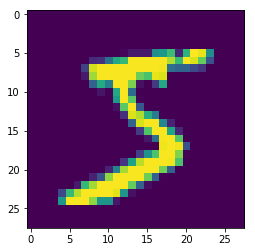

In [0]:
## Looking at the shape of the dataset

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
## Converting from 2D to 3D (Convolution won't accept 2D)

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
## Converting the datatype to float and normalize the data values to the range (0,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
## Checking the classes
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
## Model architecture

from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Con

In [0]:
## Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        210       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 20)          1820      
__________

In [0]:
## Compile Model

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
## Fit the model on the training data

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.2063 - acc: 0.9369
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0754 - acc: 0.9769
Epoch 3/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0576 - acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0466 - acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0398 - acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0360 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0320 - acc: 0.9898
Epoch 8/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0287 - acc: 0.9906
Epoch 9/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0256 - acc: 0.9919
Epoch 10/10
60000/60000 [==============================] - 10s 168us/step - loss: 

In [0]:
## Evaluate the model on the test data

score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
## Print the accuracy

print(score)

[0.042641685997415336, 0.9873]


**Validation Accuracy - 98.73**

In [0]:
## Make the prediction on the test data

y_pred = model.predict(X_test)

In [0]:
## Print the predictions

print(y_pred[:9])
print(y_test[:9])

[[1.1674972e-09 2.2243992e-13 1.2955205e-06 4.5008546e-06 8.9062649e-13
  2.9467440e-09 4.2032456e-16 9.9999404e-01 5.2372895e-10 1.0637597e-07]
 [3.0825581e-10 2.5583176e-08 1.0000000e+00 9.3582486e-10 5.5812102e-16
  3.0883838e-14 3.2479979e-09 1.4213733e-15 1.3521055e-10 7.1324610e-16]
 [4.3405007e-06 9.9817920e-01 3.9533715e-04 9.0846937e-05 3.7739601e-04
  1.7515473e-05 2.3350924e-05 6.9547264e-04 6.4665968e-05 1.5191843e-04]
 [9.9990726e-01 1.0304842e-10 8.6674407e-07 2.1797456e-07 7.8125444e-09
  2.3548032e-06 6.9822483e-05 4.2830553e-08 3.4418616e-07 1.9054427e-05]
 [5.1515742e-10 3.0389009e-12 5.9962337e-09 1.4875209e-10 9.9999845e-01
  1.4276279e-12 1.5992952e-11 1.6111262e-10 2.8486399e-10 1.4903000e-06]
 [1.1097435e-05 9.9146479e-01 3.2638756e-04 9.6225260e-05 3.9299522e-03
  3.1903787e-06 1.8581400e-06 3.3985465e-03 1.7532673e-04 5.9258530e-04]
 [3.6268114e-16 3.9262982e-10 2.8011728e-08 5.0959584e-12 9.9999011e-01
  1.9840352e-11 3.9377082e-16 2.5799054e-09 7.4950335e-06 